# Qué tipo de cocina es?

El dataset está tomado de una competencia de Kaggle, donde a partir de un dataset con ingredientes de recetas, se debe clasificar a qué tipo de cocina pertenece dicha receta (japonesa, italiana, etc.)
En principio se hará un análisis exploratorio de los datos, tipos de cocina, ingredientes más utilizados en todo el dataset, así como también por tipo de cocina.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download('punkt')

In [2]:
data = pd.read_json('train.json')
data.head()

cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [4]:
data.shape

(39774, 3)

In [5]:
print("El dataset contiene {} recetas.".format(len(data)))

El dataset contiene 39774 recetas.


In [6]:
print("Primeras 5 recetas:")
data.head()

Primeras 5 recetas:


cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

Se puede ver que nuestros datos tienen el tipo de cocina, un identificador y los ingredientes de la receta.
Cuisine: Tipo de cocina (Target)
Id: Identificador único de la receta, no lo utilizaremos.
Ingredients: Los ingredientes de la receta. A partir de esto haremos un análisis y luego se obtendrán las features para nuestro modelo de clasificación.

In [7]:
print("Tipos de Cocina: \n{}".format(data['cuisine'].unique()))

Tipos de Cocina: 
['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


In [8]:
print("Cantidad de categorías de cocina: {}".format(len(data['cuisine'].unique())))

Cantidad de categorías de cocina: 20


In [9]:
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)
usuario = # usuario
key_api = # contraseña
plotly.tools.set_credentials_file(username = usuario, api_key = key_api)

In [10]:
cant_recetas = data['cuisine'].value_counts()
cant_recetas.values

array([7838, 6438, 4320, 3003, 2673, 2646, 1546, 1539, 1423, 1175,  989,
        830,  825,  821,  804,  755,  667,  526,  489,  467], dtype=int64)

In [11]:
trace = go.Table(
    header=dict(values=['Tipo de Cocina', 'Cant de Recetas'],
               fill=dict(color='#EABEB0')),
    
    cells=dict(values=[cant_recetas.index,cant_recetas.values]))

layout = go.Layout(title='Número de recetas en cada categoría de cocina',
                   titlefont = dict(size = 20),
                   width=500, height=650, 
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   autosize = False,
                   margin=dict(l=30,r=30,b=1,t=50,pad=1),
                   )
fig = dict(data=[trace],layout=layout)
figure=go.Figure(data=[trace],layout=layout)
plotly.offline.iplot(figure)

<BarContainer object of 20 artists>

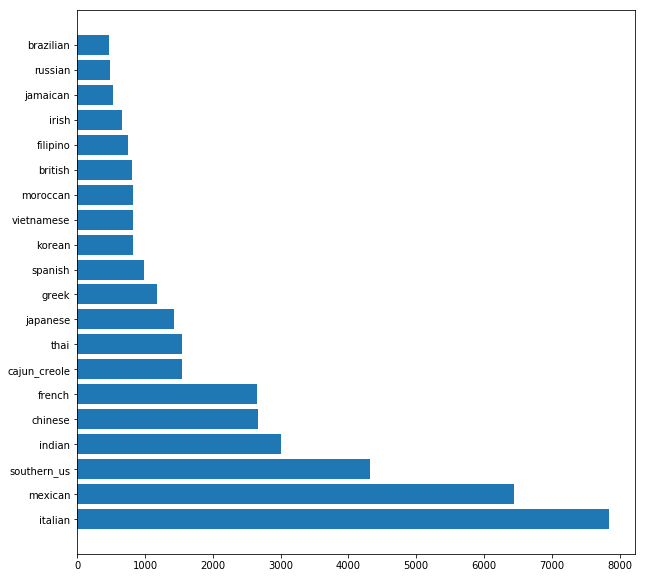

In [12]:
plt.figure(figsize=(10,10))
plt.barh(data['cuisine'].value_counts().index,data['cuisine'].value_counts())


In [13]:
cant_recetas = data['cuisine'].value_counts(ascending=True)
percentage_recetas = np.round(data['cuisine'].value_counts(ascending=True,normalize=True)*100,2)

In [14]:
cant_recetas.index.values

array(['brazilian', 'russian', 'jamaican', 'irish', 'filipino', 'british',
       'moroccan', 'vietnamese', 'korean', 'spanish', 'greek', 'japanese',
       'thai', 'cajun_creole', 'french', 'chinese', 'indian',
       'southern_us', 'mexican', 'italian'], dtype=object)

In [15]:
import random 
def random_colors(number_colors):
    colors=[]
    for i in range(number_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors
cuisine_colors = random_colors(20)

In [16]:
trace = go.Bar(x=cant_recetas,
              y=cant_recetas.index.values,
              text = percentage_recetas,textposition = 'outside',
               orientation='h',marker = dict(color = cuisine_colors)
              )

layout = go.Layout(title='Recetas en cada tipo de cocina [%]',
                   titlefont = dict(size = 25),
                   width=1000, height=600, 
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   paper_bgcolor = 'rgba(0, 0, 0, 0)',
                   margin=dict(l=75,r=110,b=50,t=60),
                   )

fig = dict(data=[trace],layout=layout)
figure=go.Figure(data=[trace],layout=layout)
plotly.offline.iplot(figure)

In [17]:
data['cant_ingr'] = data['ingredients'].str.len()
data.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

   cant_ingr  
0          9  
1         11  
2         12  
3          4  
4         20

In [18]:
print("Máximo número de ingredientes en una receta: {}".format(data['cant_ingr'].max()))
print("Mínimo número de ingredientes en una receta: {}".format(data['cant_ingr'].min()))

Máximo número de ingredientes en una receta: 65
Mínimo número de ingredientes en una receta: 1


In [19]:
data.loc[data['cant_ingr']==data['cant_ingr'].max()]['ingredients'].values

array([list(['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'NeufchÃ¢tel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground pepper', 'grated parmesan cheese', 'boneless skinless chick

Hay recetas con un único ingrediente y recetas con hasta 65 ingredientes. Veamos la distribución de esto:

In [20]:
data.loc[data['cant_ingr']==1,['cuisine','ingredients']]

cuisine                 ingredients
940       japanese                [sushi rice]
2088    vietnamese        [dried rice noodles]
6787        indian      [plain low-fat yogurt]
7011        indian           [unsalted butter]
8181      japanese                      [udon]
8852          thai               [sticky rice]
8990        indian                    [butter]
10506      mexican            [corn tortillas]
13178         thai                   [grained]
17804  southern_us      [lemonade concentrate]
18136         thai              [jasmine rice]
18324       indian           [unsalted butter]
21008      italian           [cherry tomatoes]
22119       french                    [butter]
22387       indian                [cumin seed]
23512       french            [haricots verts]
26887      mexican             [vegetable oil]
29294      spanish           [spanish chorizo]
30636      spanish  [sweetened condensed milk]
32105     japanese                     [water]
34531        greek                    [phyllo]
37220       indian           [unsalted butter]

In [21]:
len(data.loc[data['cant_ingr']>=31,['cuisine','ingredients']])

40

In [22]:
trace = go.Histogram(x=data['cant_ingr'],
                    xbins=dict(start=0,end=90,size=1),)

layout = go.Layout(title='Distribución de Cant. de Ingredientes',
                   titlefont = dict(size = 20),
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   bargap=0.1,
                   bargroupgap=0.2
                   )
fig = dict(data=[trace],layout=layout)
figure=go.Figure(data=[trace],layout=layout)
plotly.offline.iplot(figure)

In [23]:
for i,receta in enumerate(cant_recetas.index):
    print(i+1,receta)

1 brazilian
2 russian
3 jamaican
4 irish
5 filipino
6 british
7 moroccan
8 vietnamese
9 korean
10 spanish
11 greek
12 japanese
13 thai
14 cajun_creole
15 french
16 chinese
17 indian
18 southern_us
19 mexican
20 italian


In [24]:
traces = []
for i,receta in enumerate(cant_recetas.index):
    trace = go.Box(
    y = data.loc[data['cuisine']==receta]['cant_ingr'],name=receta,
    marker = dict(color = cuisine_colors[i]))
    traces.append(trace)

layout = go.Layout(
    title = "Cant ingredientes por cocina"
)
figure=go.Figure(data=traces,layout=layout)
plotly.offline.iplot(figure)

## Cantidad de Ingredientes

Contar la cantidad de veces que aparece cada ingrediente en el dataset

In [25]:
all_ingr = []
for ingredients in data['ingredients']:
    for ingr in ingredients:
        all_ingr.append(ingr)

In [26]:
from collections import Counter

countingr = Counter()
for ingr in all_ingr:
     countingr[ingr] += 1
countingr.most_common(10)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632)]

In [27]:
[i[0] for i in countingr.most_common(10)]

['salt',
 'onions',
 'olive oil',
 'water',
 'garlic',
 'sugar',
 'garlic cloves',
 'butter',
 'ground black pepper',
 'all-purpose flour']

In [28]:
[i[1] for i in countingr.most_common(10)]

[18049, 7972, 7972, 7457, 7380, 6434, 6237, 4848, 4785, 4632]

In [29]:
trace = go.Bar(x=[i[1] for i in countingr.most_common(20)],
              y=[i[0] for i in countingr.most_common(20)],
               orientation='h',marker = dict(color = cuisine_colors)
              )

layout = go.Layout(title='Ingredientes más usados',
                   titlefont = dict(size = 15),
                   width=800, height=500, 
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   paper_bgcolor = 'rgba(0, 0, 0, 0)',
                   margin=dict(l=150,r=10,b=60,t=60,pad=5)
                   )

fig = dict(data=[trace],layout=layout)
figure=go.Figure(data=[trace],layout=layout)
plotly.offline.iplot(figure)

In [30]:
countingr.most_common()[:-20-1:-1]

[('crushed cheese crackers', 1),
 ('tomato garlic pasta sauce', 1),
 ('lop chong', 1),
 ('Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix', 1),
 ('LiptonÂ® Iced Tea Brew Family Size Tea Bags', 1),
 ('ciabatta loaf', 1),
 ('cholesterol free egg substitute', 1),
 ('orange glaze', 1),
 ('Challenge Butter', 1),
 ('Oscar Mayer Cotto Salami', 1),
 ('Kraft Slim Cut Mozzarella Cheese Slices', 1),
 ('curry mix', 1),
 ('Daiya', 1),
 ('tongue', 1),
 ('game', 1),
 ('rotini pasta, cook and drain', 1),
 ('chocolate flavored liqueur', 1),
 ('ketjap', 1),
 ('ranch-style seasoning', 1),
 ('whole wheat peasant bread', 1)]

In [31]:
def get_cuisine_unique_ingr(cuisine,number,all_ingr):
    all_other=[]
    for ingr_lst in data.loc[data['cuisine']!=cuisine,'ingredients']:
        for ingr in ingr_lst:
            all_other.append(ingr)
    all_other = list(set(all_other))
    
    all_this = []
    for ingr_lst in data.loc[data['cuisine']==cuisine,'ingredients']:
        for ingr in ingr_lst:
            all_this.append(ingr)
    all_this = list(set(all_this))
    
    only_this = [word for word in all_this if word not in all_other]
    
    my_counter = Counter()
    
    for ingr_lst in data.loc[data['cuisine'] == cuisine,'ingredients']:
        for ingr in ingr_lst:
            if ingr in only_this:
                my_counter[ingr] += 1
                
    cuisinespec = pd.DataFrame(my_counter.most_common(number), columns = ['ingredient','count'])
    return(cuisinespec)

In [32]:
cuisinespec= get_cuisine_unique_ingr('mexican', 10, all_ingr)
print("The top 10 unique ingredients in Mexican cuisine are:")
cuisinespec 

The top 10 unique ingredients in Mexican cuisine are:


ingredient  count
0          refried beans    250
1     taco seasoning mix    181
2    red enchilada sauce     65
3             taco sauce     63
4        poblano chilies     33
5      mexican chocolate     32
6   baked tortilla chips     31
7  green enchilada sauce     31
8           Mexican beer     30
9               chipotle     25

In [33]:
cuisinespec= get_cuisine_unique_ingr('italian', 10, all_ingr)
print("The top 10 unique ingredients in -italian cuisine are:")
cuisinespec 

The top 10 unique ingredients in -italian cuisine are:


ingredient  count
0                              gnocchi     41
1  lasagna noodles, cooked and drained     26
2                  bulk italian sausag     21
3                       potato gnocchi     20
4                       cheese ravioli     18
5                           bocconcini     17
6        BertolliÂ® Classico Olive Oil     16
7                              ravioli     16
8                             bucatini     16
9                     dried fettuccine     14

In [34]:
cuisinespec= get_cuisine_unique_ingr('japanese', 10, all_ingr)
print("The top 10 unique ingredients in japanese cuisine are:")
cuisinespec 

The top 10 unique ingredients in japanese cuisine are:


ingredient  count
0      dashi powder     16
1    tonkatsu sauce     14
2           mitsuba      6
3  sushi grade tuna      5
4              yuzu      5
5       hatcho miso      4
6          kamaboko      4
7            sansho      4
8         abura age      4
9          umeboshi      3

In [35]:
cuisinespec= get_cuisine_unique_ingr('korean', 10, all_ingr)
print("The top 10 unique ingredients in korean cuisine are:")
cuisinespec 

The top 10 unique ingredients in korean cuisine are:


ingredient  count
0                gochugaru     30
1               rice syrup     10
2       korean chile paste     10
3                 doenzang      6
4             kimchi juice      6
5               pear juice      6
6              pancake mix      5
7             korean chile      3
8  sweet potato vermicelli      3
9              sesame salt      2

In [36]:
cuisinespec= get_cuisine_unique_ingr('chinese', 10, all_ingr)
print("The top 10 unique ingredients in chinese cuisine are:")
cuisinespec 

The top 10 unique ingredients in chinese cuisine are:


ingredient  count
0  fermented black beans     36
1  ground sichuan pepper     17
2  dried black mushrooms      9
3                maltose      9
4               shaoxing      9
5     black rice vinegar      9
6               char siu      8
7   Chinese rice vinegar      8
8              lily buds      8
9                 chenpi      7

In [37]:
cuisinespec= get_cuisine_unique_ingr('french', 10, all_ingr)
print("The top 10 unique ingredients in french cuisine are:")
cuisinespec 

The top 10 unique ingredients in french cuisine are:


ingredient  count
0                  rouille      6
1                egg bread      4
2               knockwurst      4
3             snail shells      4
4                goose fat      4
5        rendered duck fat      4
6                 escargot      4
7                camembert      4
8  dried lavender blossoms      4
9                   cantal      3

In [38]:
mexican_cuisine = get_cuisine_unique_ingr('mexican', 10, all_ingr)
italian_cuisine = get_cuisine_unique_ingr('italian', 10, all_ingr)

trace0 = go.Table(
    header=dict(values=['Ingredient', 'Count'],
               fill=dict(color='#EABEB0')),
    
    cells=dict(values=[mexican_cuisine['ingredient'],mexican_cuisine['count']]))

trace1 = go.Table(
    header=dict(values=['Ingredient', 'Count'],
               fill=dict(color='#EABEB0')),
    
    cells=dict(values=[italian_cuisine['ingredient'],italian_cuisine['count']]))

fig = tls.make_subplots(rows=1, cols=2,subplot_titles=['tabla1','tabla2'])



# fig.append_trace(trace0, 1, 1)
# fig.append_trace(trace1, 1, 2)


# fig['layout'].update(height=600, width=800,
#                      paper_bgcolor ='rgba(0,0,0,0)',
#                      plot_bgcolor = 'rgba(0,0,0,0)',
#                      title='Cant de ingredientes únicos')

# fig['layout']['xaxis1']= dict(fig['layout']['xaxis1'], **table0['layout']['xaxis'])
# fig['layout']['yaxis1']= dict(fig['layout']['yaxis1'], **table0['layout']['yaxis'])
# fig['layout']['xaxis2']= dict(fig['layout']['xaxis2'], **table1['layout']['xaxis'])
# fig['layout']['yaxis2']= dict(fig['layout']['yaxis2'], **table1['layout']['yaxis'])

# for k in range(len(table1['layout']['annotations'])):
#         table1['layout']['annotations'][k].update(xref='x2', yref='y2')
        
# fig['layout']['annotations'].extend(table0['layout']['annotations']+table1['layout']['annotations'])   

# #py.iplot(fig, filename='simple-subplot-with-annotations')

# # layout = go.Layout(title='Cant de ingredientes únicos',
# #                    titlefont = dict(size = 20),
# #                    width=500, height=650, 
# #                    paper_bgcolor =  'rgba(0,0,0,0)',
# #                    plot_bgcolor = 'rgba(0,0,0,0)',
# #                    autosize = False,
# #                    margin=dict(l=30,r=30,b=1,t=50,pad=1),
# #                    )

# plotly.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [39]:
data['ingr_str'] = data['ingredients'].apply(lambda x: ' '.join(x))
data.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

   cant_ingr                                           ingr_str  
0          9  romaine lettuce black olives grape tomatoes ga...  
1         11  plain flour ground pepper salt tomatoes ground...  
2         12  eggs pepper salt mayonaise cooking oil green c...  
3          4                     water vegetable oil wheat salt  
4         20  black pepper shallots cornflour cayenne pepper...

In [40]:
def get_all_cuisine_top(cuisine):
#     all_this = []
#     for ingr_lst in data.loc[data['cuisine']==cuisine,'ingredients']:
#         for ingr in ingr_lst:
#             all_this.append(ingr)
#     all_this = list(set(all_this))
    
    my_counter = Counter()
    for ingr_lst in data.loc[data['cuisine'] == cuisine,'ingredients']:
        for ingr in ingr_lst:
            my_counter[ingr] += 1
                
    #cuisinelist = pd.DataFrame(my_counter.most_common(number), columns = ['ingredient','count'])
    #return(cuisinelist)
    return my_counter

In [41]:
def get_cuisine_top(cuisine,number):
#     all_this = []
#     for ingr_lst in data.loc[data['cuisine']==cuisine,'ingredients']:
#         for ingr in ingr_lst:
#             all_this.append(ingr)
#     all_this = list(set(all_this))
    
    my_counter = Counter()
    for ingr_lst in data.loc[data['cuisine'] == cuisine,'ingredients']:
        for ingr in ingr_lst:
            my_counter[ingr] += 1
                
    #cuisinelist = pd.DataFrame(my_counter.most_common(number), columns = ['ingredient','count'])
    #return(cuisinelist)
    return my_counter.most_common(number)

In [42]:
def get_cuisine_top_df(cuisine,number):
#     all_this = []
#     for ingr_lst in data.loc[data['cuisine']==cuisine,'ingredients']:
#         for ingr in ingr_lst:
#             all_this.append(ingr)
#     all_this = list(set(all_this))
    
    my_counter = Counter()
    for ingr_lst in data.loc[data['cuisine'] == cuisine,'ingredients']:
        for ingr in ingr_lst:
            my_counter[ingr] += 1
                
    cuisinelist = pd.DataFrame(my_counter.most_common(number), columns = ['ingredient','count'])
    return(cuisinelist)



In [43]:
get_cuisine_top_df("mexican",5)

ingredient  count
0          salt   2720
1        onions   1493
2  ground cumin   1346
3        garlic   1317
4     olive oil   1289

In [44]:
cuisine_names = ['italian','french','british','vietnamese','chinese','thai','japanese']
cuisine_tops = [get_cuisine_top_df(cuisine,5)['ingredient'].values for cuisine in cuisine_names]
top_ingredients_by_cuisine = pd.DataFrame(data=cuisine_tops,index=cuisine_names,
                        columns=['top{}'.format(i) for i in range(1,6)]).reset_index().rename({'index':'cuisine'},axis=1)
top_ingredients_by_cuisine

cuisine        top1               top2               top3  \
0     italian        salt          olive oil      garlic cloves   
1      french        salt              sugar  all-purpose flour   
2     british        salt  all-purpose flour             butter   
3  vietnamese  fish sauce              sugar               salt   
4     chinese   soy sauce         sesame oil               salt   
5        thai  fish sauce             garlic               salt   
6    japanese   soy sauce               salt              mirin   

                     top4           top5  
0  grated parmesan cheese         garlic  
1         unsalted butter      olive oil  
2                    milk           eggs  
3                  garlic          water  
4             corn starch          sugar  
5            coconut milk  vegetable oil  
6                   sugar          water

In [45]:
trace = go.Table(
    header=dict(values=['Cocina', 'Top1','Top2','Top3','Top4','Top5'],
               fill=dict(color='#EABEB0')),
    
    cells=dict(values=[top_ingredients_by_cuisine['cuisine'],
                       top_ingredients_by_cuisine['top1'],
                       top_ingredients_by_cuisine['top2'],
                       top_ingredients_by_cuisine['top3'],
                       top_ingredients_by_cuisine['top4'],
                       top_ingredients_by_cuisine['top5']
                      ]))

layout = go.Layout(title='Top 5 Ingredientes por Cocina',
                   titlefont = dict(size = 18),
                   width=900, height=900, 
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   autosize = True,
                   margin=dict(l=30,r=30,b=1,t=50,pad=1),
                   )
fig = dict(data=[trace],layout=layout)
figure=go.Figure(data=[trace],layout=layout)
plotly.offline.iplot(figure)

In [46]:
cuisine_names = [cuisine for cuisine in data['cuisine'].unique()[0:10]]
cuisine_tops = [get_cuisine_top_df(cuisine,5)['ingredient'].values for cuisine in cuisine_names]
top_ingredients_by_cuisine = pd.DataFrame(data=cuisine_tops,index=cuisine_names,
                        columns=['top{}'.format(i) for i in range(1,6)]).reset_index().rename({'index':'cuisine'},axis=1)
top_ingredients_by_cuisine

cuisine       top1               top2               top3  \
0        greek       salt          olive oil      dried oregano   
1  southern_us       salt             butter  all-purpose flour   
2     filipino       salt             garlic              water   
3       indian       salt             onions       garam masala   
4     jamaican       salt             onions              water   
5      spanish       salt          olive oil      garlic cloves   
6      italian       salt          olive oil      garlic cloves   
7      mexican       salt             onions       ground cumin   
8      chinese  soy sauce         sesame oil               salt   
9      british       salt  all-purpose flour             butter   

                     top4                  top5  
0           garlic cloves  feta cheese crumbles  
1                   sugar            large eggs  
2                  onions             soy sauce  
3                   water       ground turmeric  
4                  garlic       ground allspice  
5  extra-virgin olive oil                onions  
6  grated parmesan cheese                garlic  
7                  garlic             olive oil  
8             corn starch                 sugar  
9                    milk                  eggs

In [47]:
cuisine_names = [cuisine for cuisine in data['cuisine'].unique()[10:20]]
cuisine_tops = [get_cuisine_top_df(cuisine,5)['ingredient'].values for cuisine in cuisine_names]
top_ingredients_by_cuisine = pd.DataFrame(data=cuisine_tops,index=cuisine_names,
                        columns=['top{}'.format(i) for i in range(1,6)]).reset_index().rename({'index':'cuisine'},axis=1)
top_ingredients_by_cuisine

cuisine        top1               top2               top3  \
0          thai  fish sauce             garlic               salt   
1    vietnamese  fish sauce              sugar               salt   
2  cajun_creole        salt             onions             garlic   
3     brazilian        salt             onions          olive oil   
4        french        salt              sugar  all-purpose flour   
5      japanese   soy sauce               salt              mirin   
6         irish        salt  all-purpose flour             butter   
7        korean   soy sauce         sesame oil             garlic   
8      moroccan        salt          olive oil       ground cumin   
9       russian        salt              sugar             onions   

                top4             top5  
0       coconut milk    vegetable oil  
1             garlic            water  
2  green bell pepper           butter  
3               lime            water  
4    unsalted butter        olive oil  
5              sugar            water  
6             onions            sugar  
7       green onions            sugar  
8             onions  ground cinnamon  
9  all-purpose flour       sour cream

In [48]:
cuisine_names = [cuisine for cuisine in data['cuisine'].unique()]
cuisine_tops = [get_cuisine_top_df(cuisine,10)['ingredient'].values for cuisine in cuisine_names]
top_ingredients_by_cuisine = pd.DataFrame(data=cuisine_tops,index=cuisine_names,
                        columns=['top{}'.format(i) for i in range(1,11)]).reset_index().rename({'index':'cuisine'},axis=1)
top_ingredients_by_cuisine

cuisine        top1               top2               top3  \
0          greek        salt          olive oil      dried oregano   
1    southern_us        salt             butter  all-purpose flour   
2       filipino        salt             garlic              water   
3         indian        salt             onions       garam masala   
4       jamaican        salt             onions              water   
5        spanish        salt          olive oil      garlic cloves   
6        italian        salt          olive oil      garlic cloves   
7        mexican        salt             onions       ground cumin   
8        chinese   soy sauce         sesame oil               salt   
9        british        salt  all-purpose flour             butter   
10          thai  fish sauce             garlic               salt   
11    vietnamese  fish sauce              sugar               salt   
12  cajun_creole        salt             onions             garlic   
13     brazilian        salt             onions          olive oil   
14        french        salt              sugar  all-purpose flour   
15      japanese   soy sauce               salt              mirin   
16         irish        salt  all-purpose flour             butter   
17        korean   soy sauce         sesame oil             garlic   
18      moroccan        salt          olive oil       ground cumin   
19       russian        salt              sugar             onions   

                      top4                  top5                    top6  \
0            garlic cloves  feta cheese crumbles  extra-virgin olive oil   
1                    sugar            large eggs           baking powder   
2                   onions             soy sauce                  pepper   
3                    water       ground turmeric                  garlic   
4                   garlic       ground allspice                  pepper   
5   extra-virgin olive oil                onions                   water   
6   grated parmesan cheese                garlic     ground black pepper   
7                   garlic             olive oil            chili powder   
8              corn starch                 sugar                  garlic   
9                     milk                  eggs         unsalted butter   
10            coconut milk         vegetable oil               soy sauce   
11                  garlic                 water                 carrots   
12       green bell pepper                butter               olive oil   
13                    lime                 water           garlic cloves   
14         unsalted butter             olive oil                  butter   
15                   sugar                 water                    sake   
16                  onions                 sugar                potatoes   
17            green onions                 sugar                    salt   
18                  onions       ground cinnamon           garlic cloves   
19       all-purpose flour            sour cream                    eggs   

                      top7                 top8               top9  \
0        fresh lemon juice  ground black pepper             garlic   
1                    water      unsalted butter               milk   
2                      oil                sugar            carrots   
3               cumin seed         ground cumin      vegetable oil   
4                scallions          dried thyme       black pepper   
5                 tomatoes  ground black pepper    red bell pepper   
6   extra-virgin olive oil               onions              water   
7         jalapeno chilies           sour cream            avocado   
8                    water         green onions      vegetable oil   
9                    sugar               onions      baking powder   
10                   sugar                water      garlic cloves   
11               soy sauce             shallots      garlic cloves   
12          cayenne pepper     

In [49]:
# cuantif = {}
# for cuisine in data['cuisine'].unique():
#     cuantif[cuisine] = Counter()
#     indices = (data['cuisine'] == cuisine)
#     for ingredients in data[indices]['ingredients']:
#         cuantif[cuisine].update(ingredients)

In [50]:
# top_ten = pd.DataFrame([[items[0] for items in cuantif[cuisine].most_common(10)] for cuisine in cuantif],
#             index=[cuisine for cuisine in cuantif],
#             columns=['top{}'.format(i) for i in range(1,11)])
# top_ten

In [58]:
# f,ax=plt.subplots(10,2,figsize=(20,60))
# def ingre_cusine(cuisine):
#     frame=data[data['cuisine']==cuisine]
#     common=list(nltk.bigrams(nltk.word_tokenize(",".join(frame['ingr_str']))))
#     return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:10]

# ingre_cusine('brazilian').plot.barh(ax=ax[0,0],width=0.9,color='#330099')
# ax[0,0].set_title('Brazilian Cuisine')

# ingre_cusine('russian').plot.barh(ax=ax[0,1],width=0.9,color='#99c2ff')
# ax[0,1].set_title('Russian Cuisine')

# ingre_cusine('jamaican').plot.barh(ax=ax[1,0],width=0.9,color='#ffe699')
# ax[1,0].set_title('Jamaican Cuisine')

# ingre_cusine('irish').plot.barh(ax=ax[1,1],width=0.9,color='#009900')
# ax[1,1].set_title('Irish Cuisine')

# ingre_cusine('filipino').plot.barh(ax=ax[2,0],width=0.9,color='#FFCB2F')
# ax[2,0].set_title('Filipino Cuisine')

# ingre_cusine('british').plot.barh(ax=ax[2,1],width=0.9,color='#A5FF8A')
# ax[2,1].set_title('British Cuisine')

# ingre_cusine('moroccan').plot.barh(ax=ax[3,0],width=0.9,color='#A8CFFF')
# ax[3,0].set_title('Moroccan Cuisine')

# ingre_cusine('vietnamese').plot.barh(ax=ax[3,1],width=0.9,color='#9669FE')
# ax[3,1].set_title('Vietnamese Cuisine')

# ingre_cusine('korean').plot.barh(ax=ax[4,0],width=0.9,color='#009900')
# ax[4,0].set_title('Korean Cuisine')#9669FE

# ingre_cusine('spanish').plot.barh(ax=ax[4,1],width=0.9,color='#FF0000')
# ax[4,1].set_title('Spanish Cuisine')

# ingre_cusine('greek').plot.barh(ax=ax[5,0],width=0.9,color='#99CCFF')
# ax[5,0].set_title('Greek Cuisine')

# ingre_cusine('japanese').plot.barh(ax=ax[5,1],width=0.9,color='#330099')
# ax[5,1].set_title('Japanese Cuisine')

# ingre_cusine('thai').plot.barh(ax=ax[6,0],width=0.9,color='#99c2ff')
# ax[6,0].set_title('Thai Cuisine')

# ingre_cusine('cajun_creole').plot.barh(ax=ax[6,1],width=0.9,color='#ffe699')
# ax[6,1].set_title('Cajun_creole Cuisine')

# ingre_cusine('french').plot.barh(ax=ax[7,0],width=0.9,color='#FFCB2F')
# ax[7,0].set_title('French Cuisine')

# ingre_cusine('chinese').plot.barh(ax=ax[7,1],width=0.9,color='#A5FF8A')
# ax[7,1].set_title('Chinese Cuisine')

# ingre_cusine('indian').plot.barh(ax=ax[8,0],width=0.9,color='#A8CFFF')
# ax[8,0].set_title('Indian Cuisine')

# ingre_cusine('southern_us').plot.barh(ax=ax[8,1],width=0.9,color='#009900')
# ax[8,1].set_title('Southern US Cuisine')#9669FE

# ingre_cusine('mexican').plot.barh(ax=ax[9,0],width=0.9,color='#FF0000')
# ax[9,0].set_title('Mexican Cuisine')

# ingre_cusine('italian').plot.barh(ax=ax[9,1],width=0.9,color='#99CCFF')
# ax[9,1].set_title('Italian Cuisine')


# plt.subplots_adjust(wspace=1)


In [52]:
#!pip install WordCloud

In [53]:
#!pip install --upgrade pip 

  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\JAVI\\AppData\\Local\\Temp\\pip-uninstall-3822yj4y\\users\\javi\\anaconda3\\scripts\\pip.exe'
Consider using the `--user` option or check the permissions.



In [54]:
from wordcloud import WordCloud

def word_cloud(cuisine,max_words=10):
    
    # Read the whole text.
    # For selected cuisine
    lst = []
    for ingr in data.loc[data['cuisine'] == cuisine]['ingredients']:
        lst = lst + ingr
        
    text = ','.join(lst)
    #print(text)
    # Create word cloud
    #wordcloud = WordCloud(background_color='white', max_words=10, width=2000, height=1000,relative_scaling=.5).generate(text)
    
    wordcloud = WordCloud(background_color='white', max_words=max_words, width=2000, height=1000,relative_scaling=.5).fit_words(dict(get_all_cuisine_top(cuisine)))
    #,mask="cocinero.png",relative_scaling=1,stopwords="English",

    # Display the generated image:
    plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('Images/word clouds/'+str(cuisine))
    plt.show()

In [55]:
dict(get_cuisine_top("italian",10))

{'salt': 3454,
 'olive oil': 3111,
 'garlic cloves': 1619,
 'grated parmesan cheese': 1580,
 'garlic': 1471,
 'ground black pepper': 1444,
 'extra-virgin olive oil': 1362,
 'onions': 1240,
 'water': 1052,
 'butter': 1030}

In [ ]:
for cuisine in cuisine_names:
    word_cloud(cuisine,max_words=10)

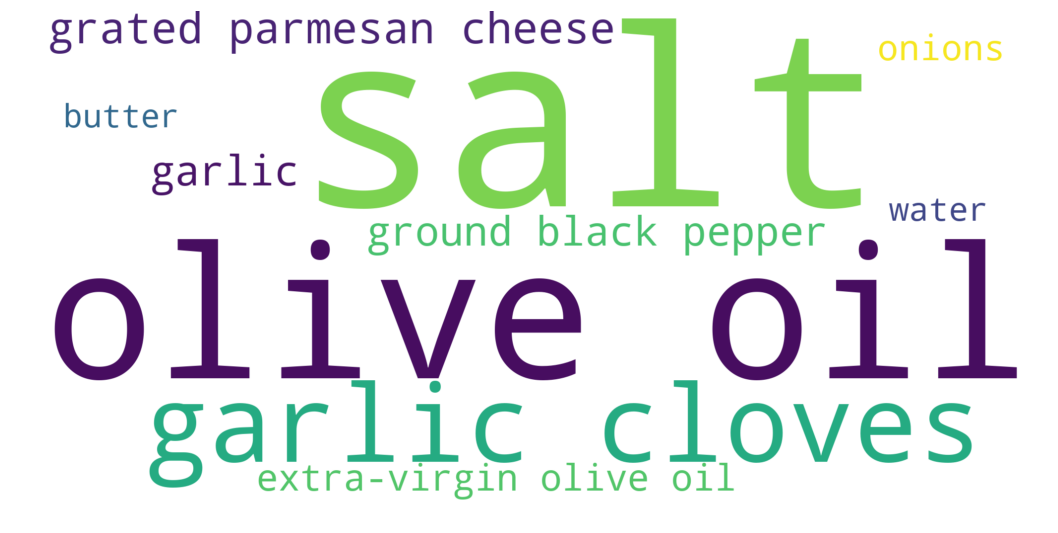

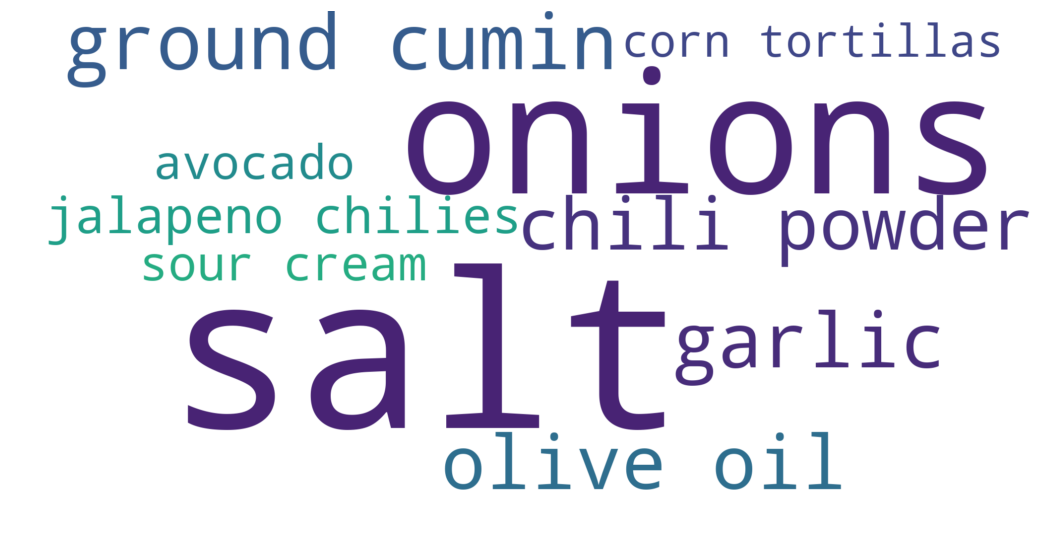

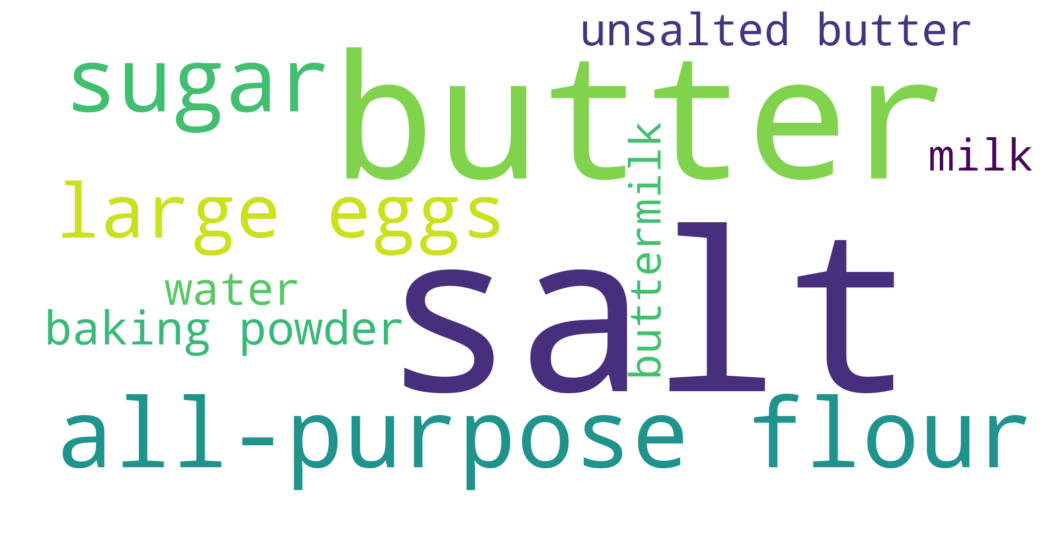

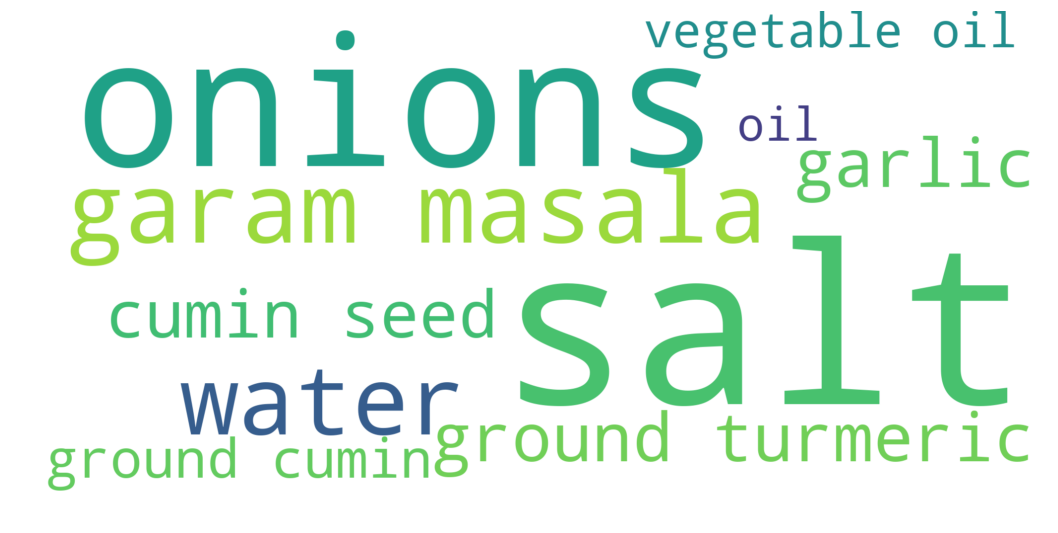

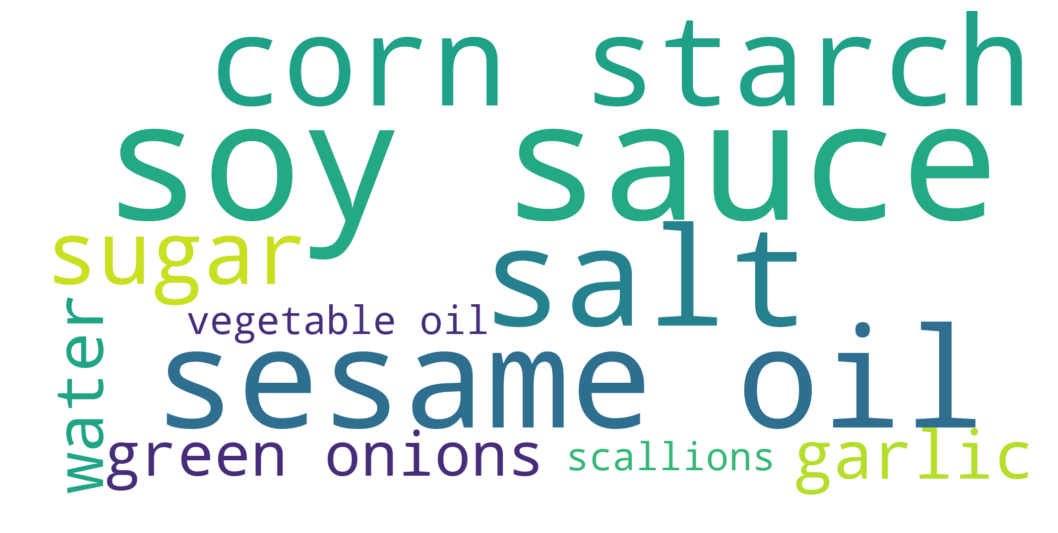

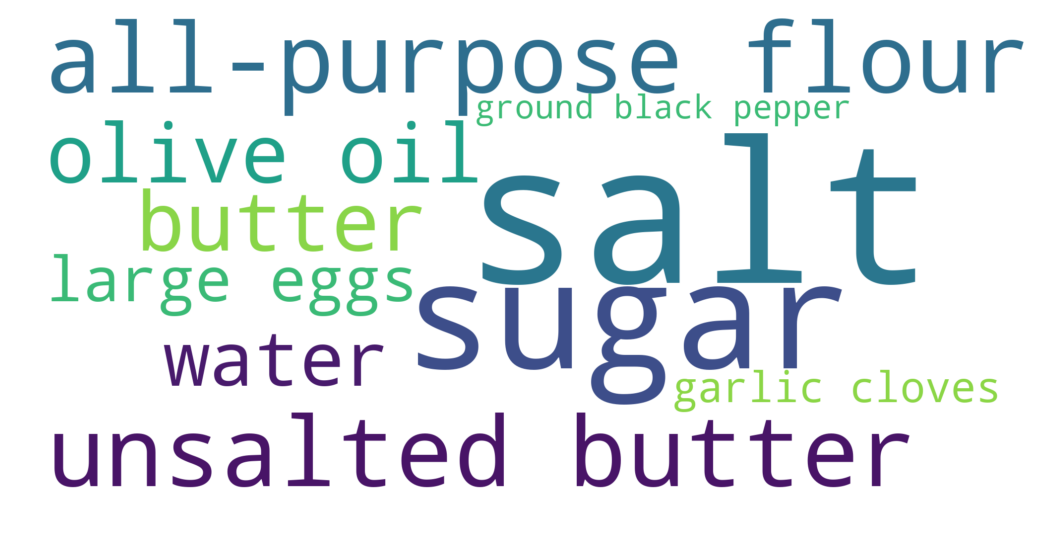

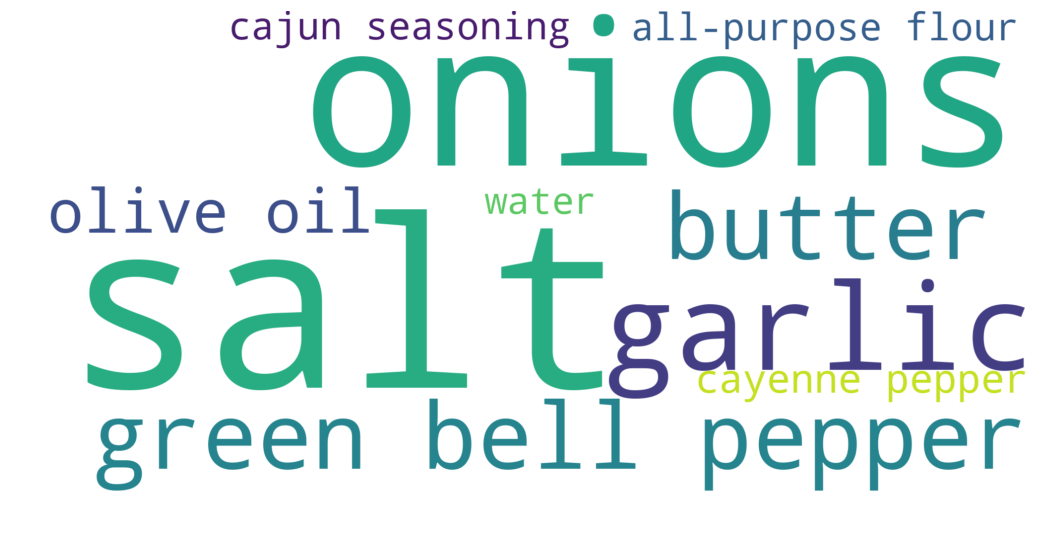

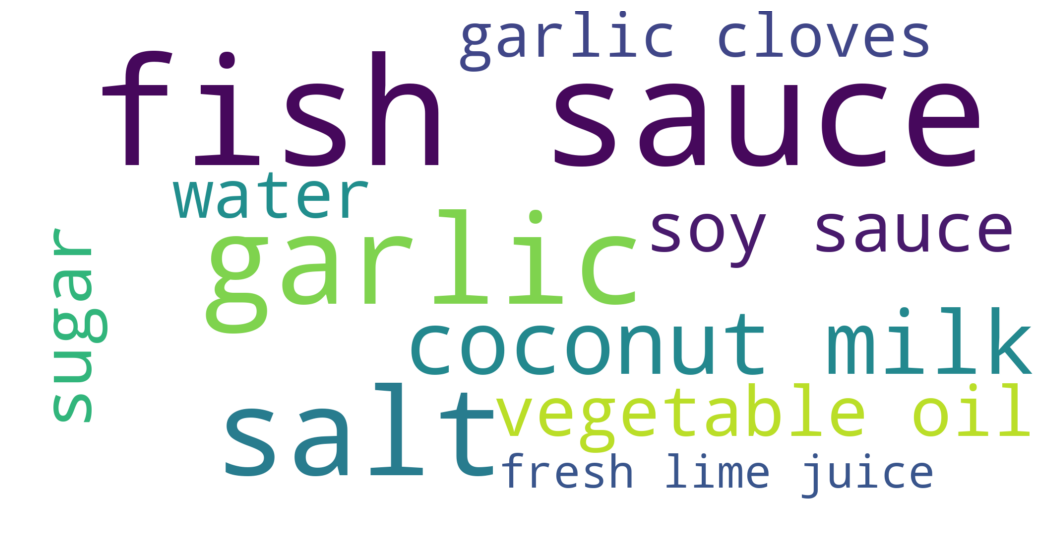

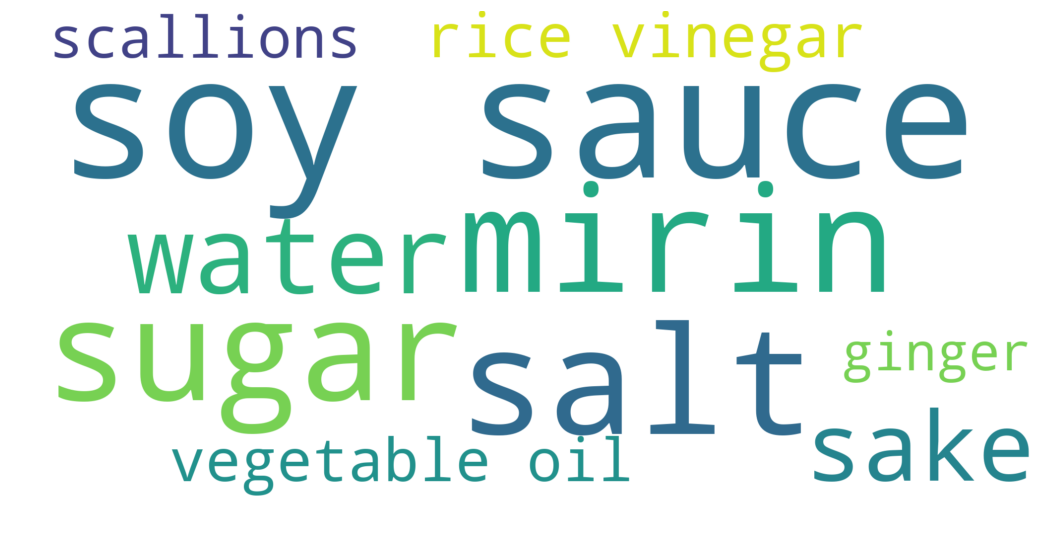

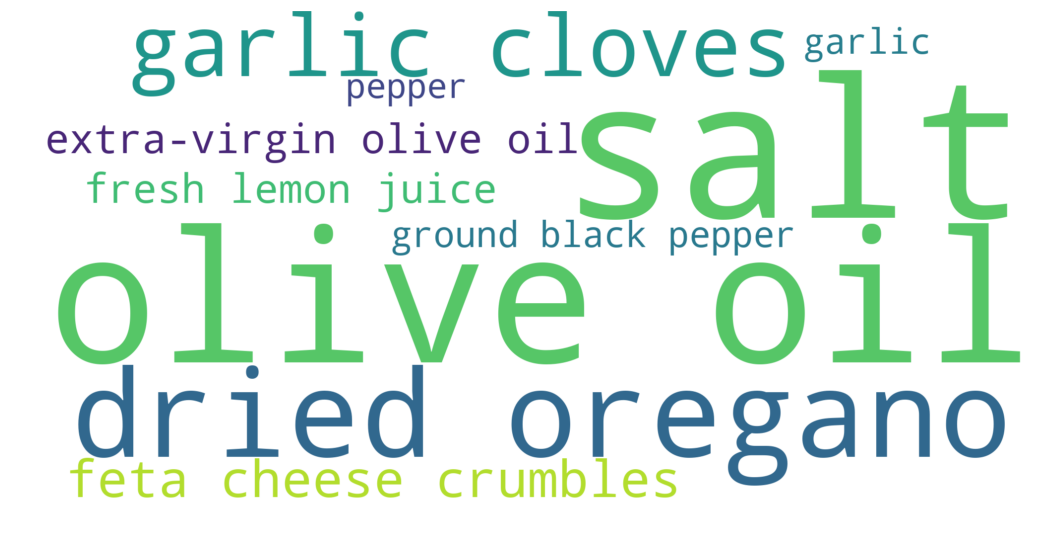

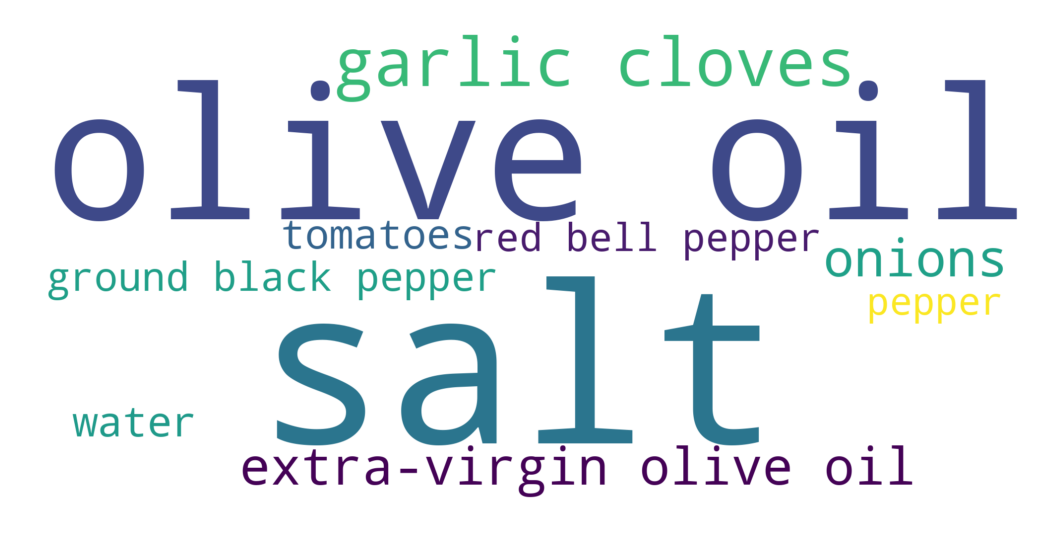

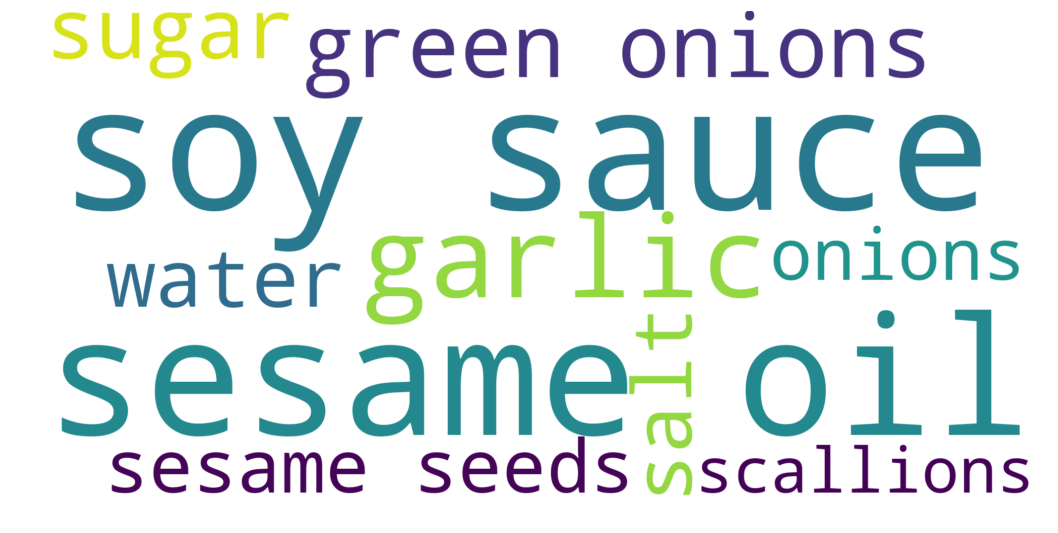

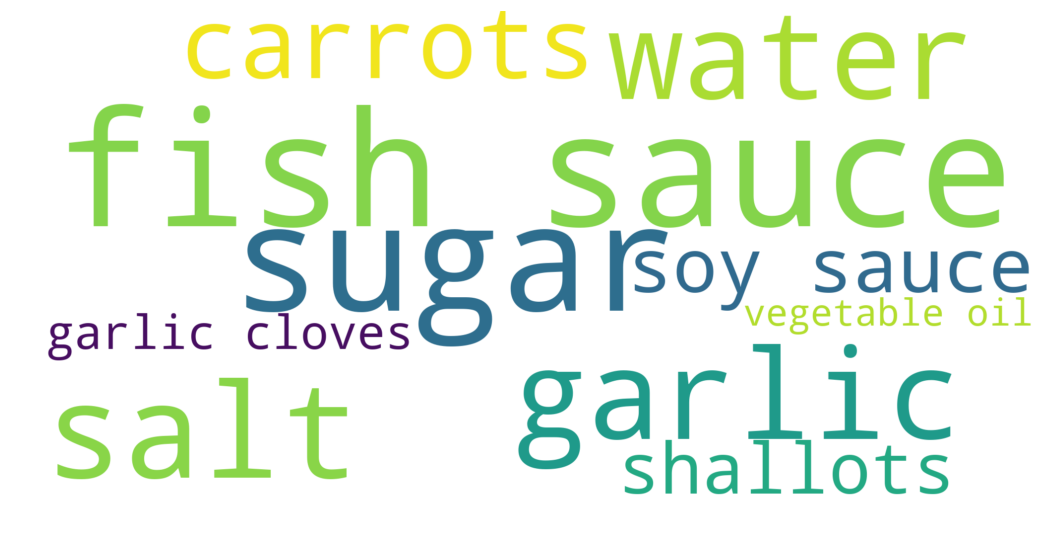

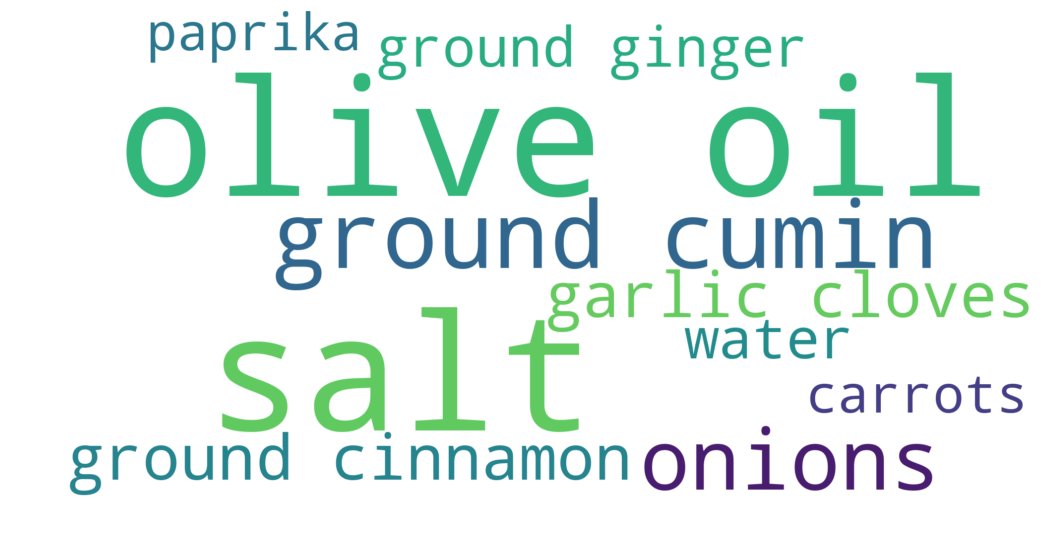

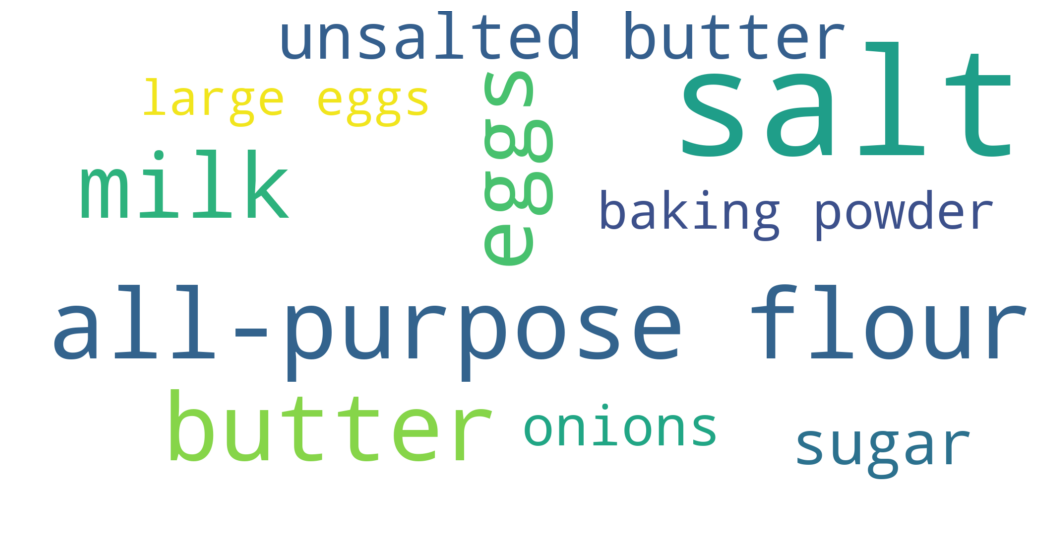

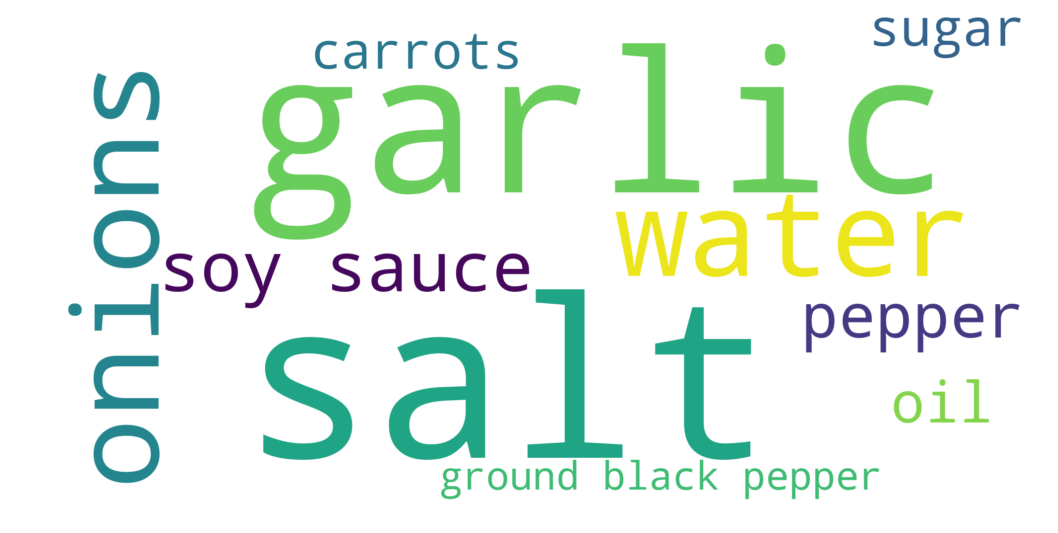

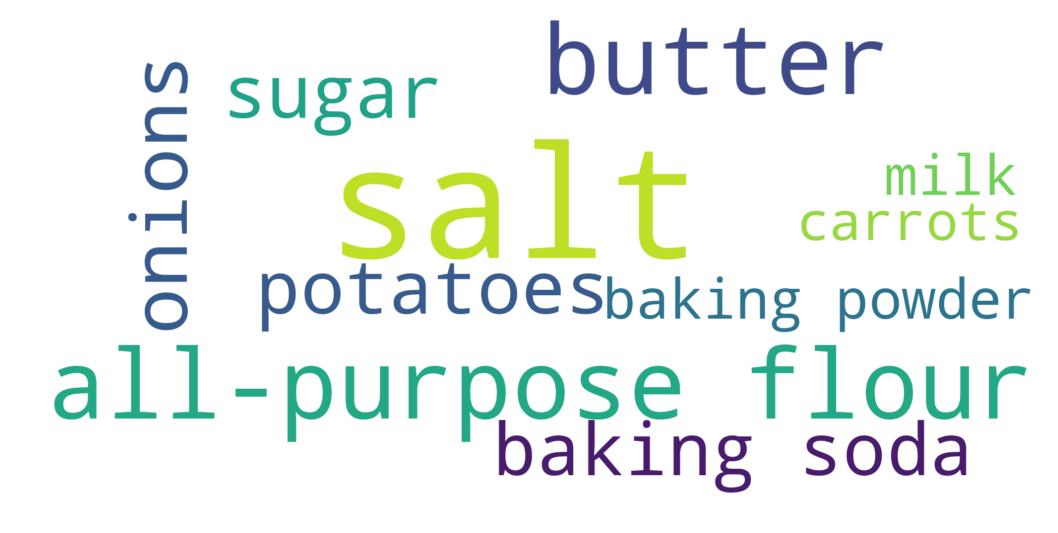

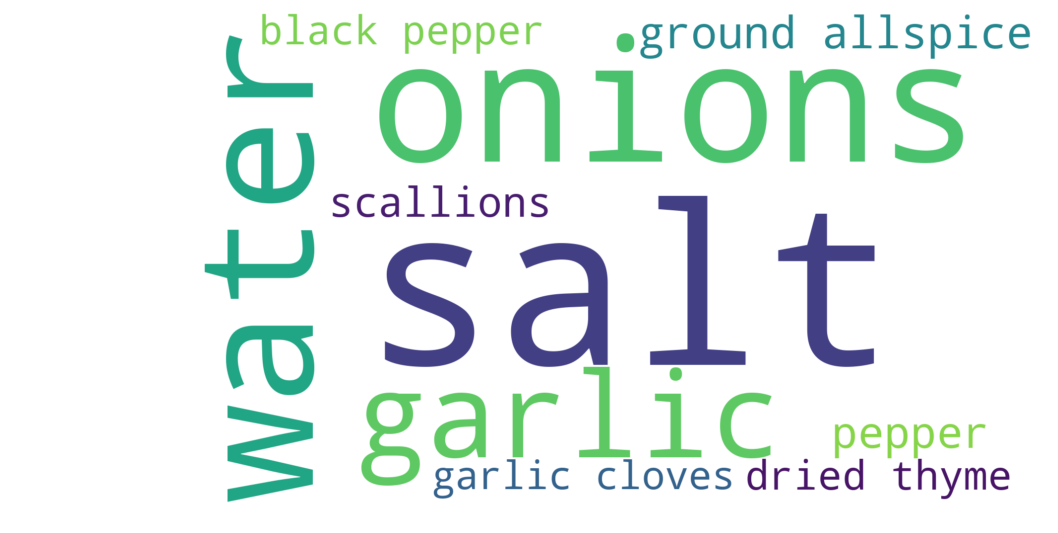

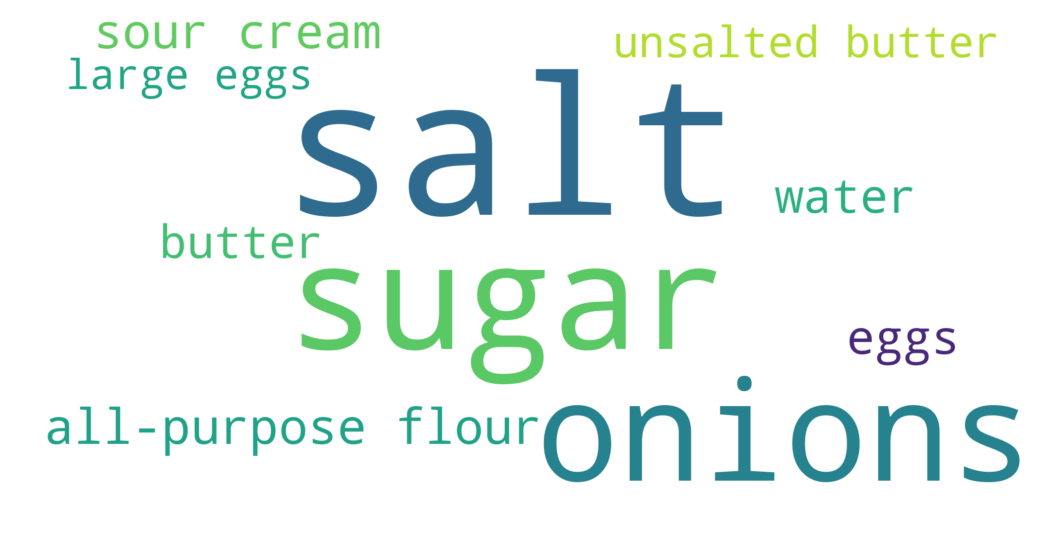

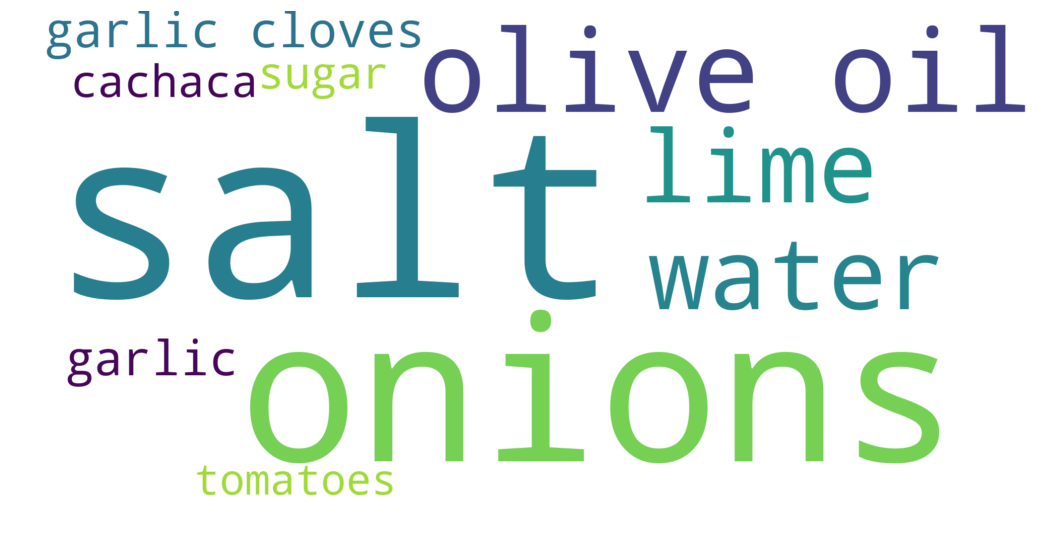

In [56]:
word_cloud("italian",max_words=10)
word_cloud("mexican",max_words=10)
word_cloud("southern_us",max_words=10)
word_cloud("indian",max_words=10)
word_cloud("chinese",max_words=10)
word_cloud("french",max_words=10)
word_cloud("cajun_creole",max_words=10)
word_cloud("thai",max_words=10)
word_cloud("japanese",max_words=10)
word_cloud("greek",max_words=10)
word_cloud("spanish",max_words=10)
word_cloud("korean",max_words=10)
word_cloud("vietnamese",max_words=10)
word_cloud("moroccan",max_words=10)
word_cloud("british",max_words=10)
word_cloud("filipino",max_words=10)
word_cloud("irish",max_words=10)
word_cloud("jamaican",max_words=10)
word_cloud("russian",max_words=10)
word_cloud("brazilian",max_words=10)